In [1]:

import importlib

from sklearn.datasets import make_regression
from ARD.ARDRegressor import ARDRegressor
from ARD.ARDClassifier import ARDClassifier
import numpy as np

from examples.plot_newton_cg import plot_newton_cg

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

In [8]:
X, y, coef = make_regression(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    noise=1.0,
    coef=True,
    random_state=2022,
)

result = pd.DataFrame({"w_true": coef.reshape(-1)})
for i in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
    regressor = ARDRegressor(n_iterations=i)
    regressor.fit(X, y)
    result[f"w, iter={i}"] = regressor.w_.reshape(-1)
display(result)

,w_true,"w, iter=1","w, iter=2","w, iter=3","w, iter=5","w, iter=8","w, iter=13","w, iter=21","w, iter=34","w, iter=55"
0,0.000000,0.052049,0.037102,0.026130,0.006300,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,-0.001108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,93.527186,93.419498,93.510783,93.510328,93.509707,93.509516,93.509516,93.509516,93.509516,93.509516
3,0.000000,-0.009597,-0.001188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.832016,53.686439,53.743593,53.744140,53.744737,53.744913,53.744913,53.744913,53.744913,53.744913
5,89.294912,89.215671,89.299548,89.299491,89.299700,89.299777,89.299777,89.299777,89.299777,89.299777
6,0.000000,-0.013271,-0.000774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.006065,0.000159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.002277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.025622,0.010126,0.001499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
import pandas as pd


X, y, coef = make_regression(
    n_samples=100,
    n_features=10,
    n_informative=10,
    noise=1.0,
    coef=True,
    random_state=2022,
)

result = pd.DataFrame({"w_true": coef.reshape(-1)})
for i in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
    regressor = ARDRegressor(n_iterations=i)
    regressor.fit(X, y)
    result[f"w, iter={i}"] = regressor.w_.reshape(-1)
display(result)

,w_true,"w, iter=1","w, iter=2","w, iter=3","w, iter=5","w, iter=8","w, iter=13","w, iter=21","w, iter=34","w, iter=55"
0,26.932597,26.625873,26.922003,26.922331,26.922327,26.922327,26.922327,26.922327,26.922327,26.922327
1,16.721412,16.273073,16.474469,16.475400,16.475400,16.475400,16.475400,16.475400,16.475400,16.475400
2,6.560967,6.499648,6.540052,6.542495,6.542501,6.542501,6.542501,6.542501,6.542501,6.542501
3,48.839742,48.391101,48.860801,48.860650,48.860646,48.860646,48.860646,48.860646,48.860646,48.860646
4,30.185907,29.858224,30.143925,30.144269,30.144270,30.144270,30.144270,30.144270,30.144270,30.144270
5,19.676954,19.540772,19.778793,19.779070,19.779065,19.779065,19.779065,19.779065,19.779065,19.779065
6,73.094679,72.465623,73.156547,73.156261,73.156255,73.156255,73.156255,73.156255,73.156255,73.156255
7,2.120164,2.228057,2.040706,2.045826,2.045875,2.045875,2.045875,2.045875,2.045875,2.045875
8,60.033068,59.227574,59.837347,59.837288,59.837289,59.837289,59.837289,59.837289,59.837289,59.837289
9,13.323137,13.184881,13.358721,13.359737,13.359736,13.359736,13.359736,13.359736,13.359736,13.359736


In [29]:
%%time

import pandas as pd
from sklearn.datasets import make_regression


X, y_regr, coef = make_regression(
    n_samples=1000,
    n_features=1000,
    n_informative=10,
    noise=1.0,
    coef=True,
    random_state=2023,
)

y_class = (y_regr > 0).astype(int)
result = pd.DataFrame({"w_true": coef})
# display(result)
model = ARDClassifier(max_iterations=1000)
model.fit(X, y_class)
result[f"w, iter={i}"] = model.coef_.reshape(-1)
display(result)
display(result.groupby(["w_true", "w, iter=1000"])[["w_true"]].count())

w_mp updated with 9 steps
w_mp updated with 6 steps
w_mp updated with 5 steps
w_mp updated with 5 steps
w_mp updated with 5 steps
w_mp updated with 4 steps
w_mp updated with 4 steps
w_mp updated with 4 steps
w_mp updated with 4 steps
w_mp updated with 4 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated

,w_true,"w, iter=1000"
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


w_true
w_true    w, iter=1000        
0.000000  -0.290807          1
          -0.273325          1
          -0.128695          1
          -0.105634          1
          -0.045357          1
          -0.000032          1
           0.000000        981
           0.269095          1
           0.271435          1
           0.478053          1
18.436848  5.695518          1
23.378981  7.202590          1
25.762775  7.334659          1
28.725621  9.193354          1
32.488471  9.882868          1
37.034172  11.596151         1
53.332656  16.706171         1
76.270644  24.317126         1
87.243361  27.560441         1
88.965562  27.815539         1

CPU times: user 19.2 s, sys: 2.76 s, total: 21.9 s
Wall time: 6.21 s


In [60]:
X, y_regr, coef = make_regression(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    noise=1.0,
    coef=True,
    random_state=None,
)

y_class = (y_regr > 0).astype(np.int8)

from matplotlib import pyplot as plt


# model_simple = ARDClassifier(max_iterations=1000, iterate_by_logw=False)
# model_simple.fit(X, y_class)


model_logw = ARDClassifier(max_iterations=1000, iterate_by_logw=True)
model_logw.fit(X, y_class)

KeyboardInterrupt: 

In [45]:
plt.figure(figsize=(12, 12))
for plot_data_simple, plot_data_log in zip(model_simple.plots_, model_logw.plots_):
    for i, (label, plot_data) in enumerate(zip(["simple", "log"], [plot_data_simple])):
        xs, ys, ws, yws = plot_data
        # xs = xs[xs < 10]
        # ys = ys[xs < 10]
        plt.plot(xs.ravel(), ys.ravel(), label=f"step {i}")
        plt.plot(ws.ravel(), yws.ravel(), "o", label=label)
        for j, (x, y) in enumerate(zip(ws, yws)):
            plt.text(x, y, str(j))
        xdiff = ws.max() - ws.min()
        # if i == 0:
        #     plt.xlim(ws.min() - xdiff, ws.max() + xdiff)
        # else:
        #     plt.xlim(
        #         min(plt.xlim()[0], ws.min() - 0.1 * xdiff),
        #         max(plt.xlim()[1], ws.max() + 0.1 * xdiff),
        #     )
    # yws_diff = yws.max() - yws.min()
    # plt.ylim(yws.min() - yws_diff, yws.max() + yws_diff)
    #     # axes[i].set_xscale("log")

    plt.legend()
    plt.show()

AttributeError: 'ARDClassifier' object has no attribute 'plots_'

<Figure size 1200x1200 with 0 Axes>

In [44]:


from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2


from sklearn.datasets import make_classification
import numpy as np
from matplotlib import pyplot as plt
from ARD.ARDClassifier import ARDClassifier

X, y = make_classification()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = ARDClassifier(max_iterations=1000).fit(X_train, y_train)
model.predict(X_test)

pydev debugger: Unable to find real location for: /var/folders/xh/l07dl6c524ddfsh4lkp2lbnxp2c0xp/T/ipykernel_46955/937201528.py


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
w_mp updated with 7 steps
w_mp updated with 5 steps
w_mp updated with 4 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 3 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_mp updated with 2 steps
w_

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [7]:
w = w_original
ws = [w]
for i in range(1):
    w, sigma, grad = ARDClassifier._update_w(w, X, a, t)
    sigma_expected = -1.0 / ddf(w)
    grad_expected = df(w)
    # assert_allclose(sigma.item(), sigma_expected)
    # assert_allclose(grad.item(), grad_expected)
    ws.append(w)

ys = np.squeeze(logprob_X__twa(X, t, np.hstack(ws), a))
xs = [w.item() for w in ws]
plt.plot(xs, ys, "o")
for i, (x, y) in enumerate(zip(xs, ys)):
    plt.text(x, y, str(i))
plt.show()

pydev debugger: Unable to find real location for: /var/folders/xh/l07dl6c524ddfsh4lkp2lbnxp2c0xp/T/ipykernel_63135/4154110973.py


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel


class RBFTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, gamma: None | float = None):
        self.gamma = gamma

    def fit(self, X, y=None):
        self._X = X.copy()
        return self

    def transform(self, X):
        return rbf_kernel(X, self._X, self.gamma)

In [16]:
import time

class Timer:
    def __enter__(self):
        self.start = time.perf_counter()
        return self

    def __exit__(self, *args):
        self.end = time.perf_counter()
        self.interval_in_seconds = self.end - self.start



dataset 0
---------
LogisticRegression: 0.86, fitted in: 0.272, predicted in: 0.001
LinearSVC: 0.86, fitted in: 0.085, predicted in: 0.001
ARDClassifier: 0.86, fitted in: 0.108, predicted in: 0.001
KBinsDiscretizer + LogisticRegression: 0.86, fitted in: 0.761, predicted in: 0.002
KBinsDiscretizer + LinearSVC: 0.94, fitted in: 0.517, predicted in: 0.002
KBinsDiscretizer + FunctionTransformer + ARDClassifier: 0.90, fitted in: 1.523, predicted in: 0.002
GradientBoostingClassifier: 0.90, fitted in: 0.387, predicted in: 0.002
SVC: 0.94, fitted in: 0.093, predicted in: 0.002
RBFTransformer + ARDClassifier: 0.94, fitted in: 3.891, predicted in: 0.001

dataset 1
---------
LogisticRegression: 0.40, fitted in: 0.074, predicted in: 0.001
LinearSVC: 0.40, fitted in: 0.057, predicted in: 0.001
ARDClassifier: 0.48, fitted in: 0.084, predicted in: 0.001
KBinsDiscretizer + LogisticRegression: 0.78, fitted in: 0.431, predicted in: 0.002
KBinsDiscretizer + LinearSVC: 0.80, fitted in: 0.264, predicted i

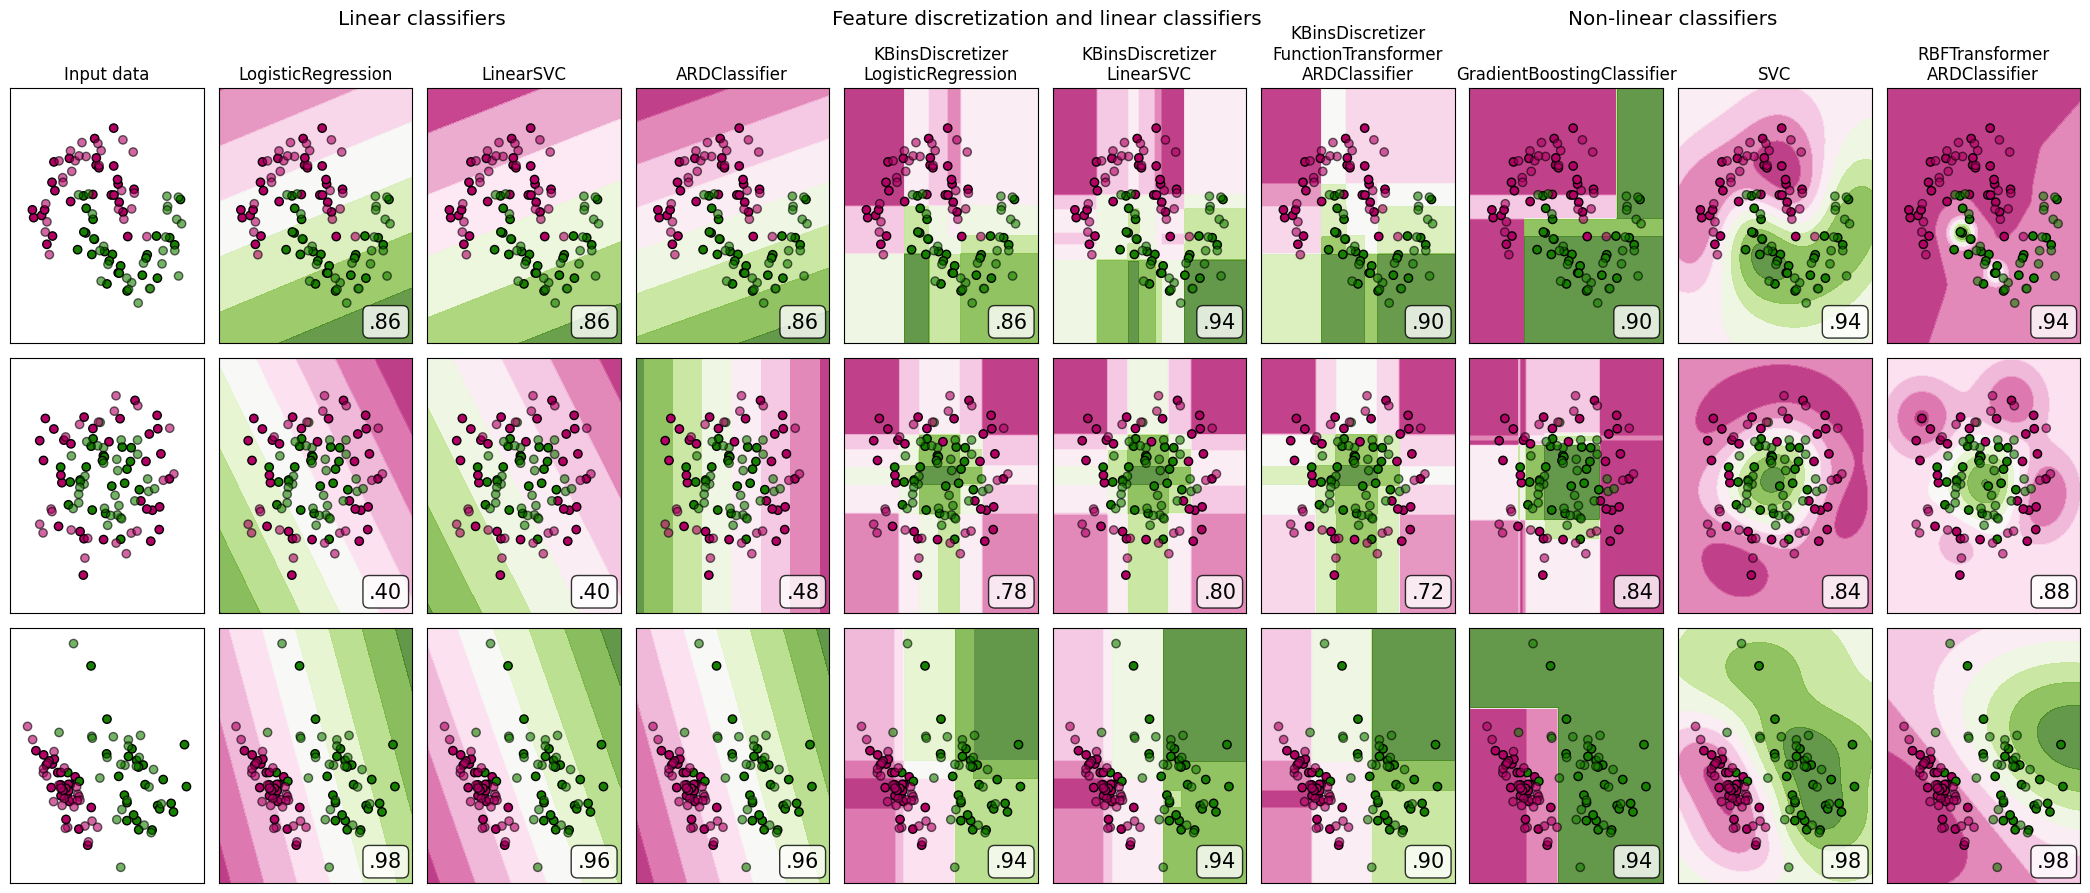

In [17]:
from sklearn.preprocessing import FunctionTransformer
# Code source: Tom Dupré la Tour
# Adapted from plot_classifier_comparison by Gaël Varoquaux and Andreas Müller
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.utils._testing import ignore_warnings
from ARD.ARDClassifier import ARDClassifier

h = 0.02  # step size in the mesh


def get_name(estimator):
    name = estimator.__class__.__name__
    if name == "Pipeline":
        name = [get_name(est[1]) for est in estimator.steps]
        name = " + ".join(name)
    return name


# list of (estimator, param_grid), where param_grid is used in GridSearchCV
# The parameter spaces in this example are limited to a narrow band to reduce
# its runtime. In a real use case, a broader search space for the algorithms
# should be used.
classifiers = [
    (
        make_pipeline(StandardScaler(), LogisticRegression(random_state=0)),
        {"logisticregression__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(StandardScaler(), LinearSVC(random_state=0, dual="auto")),
        {"linearsvc__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(StandardScaler(), ARDClassifier(max_iterations=1000)),
        {}
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            LogisticRegression(random_state=0),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
            "logisticregression__C": np.logspace(-1, 1, 3),
        },
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            LinearSVC(random_state=0, dual="auto"),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
            "linearsvc__C": np.logspace(-1, 1, 3),
        },
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            FunctionTransformer(func=lambda x: np.array(x.todense())),
            ARDClassifier(),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
        },
    ),
    (
        make_pipeline(
            StandardScaler(), GradientBoostingClassifier(n_estimators=5, random_state=0)
        ),
        {"gradientboostingclassifier__learning_rate": np.logspace(-2, 0, 5)},
    ),
    (
        make_pipeline(StandardScaler(), SVC(random_state=0)),
        {"svc__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(StandardScaler(), RBFTransformer(), ARDClassifier()),
        {"rbftransformer__gamma": np.logspace(-1, 1, 5, endpoint=True)}
    ),
]

names = [get_name(e).replace("StandardScaler + ", "") for e, _ in classifiers]

n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_classification(
        n_samples=n_samples,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=2,
        n_clusters_per_class=1,
    ),
]

fig, axes = plt.subplots(
    nrows=len(datasets), ncols=len(classifiers) + 1, figsize=(21, 9)
)

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])

# iterate over datasets
for ds_cnt, (X, y) in enumerate(datasets):
    print(f"\ndataset {ds_cnt}\n---------")

    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42
    )

    # create the grid for background colors
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot the dataset first
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # and testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # iterate over classifiers
    for est_idx, (name, (estimator, param_grid)) in enumerate(zip(names, classifiers)):
        ax = axes[ds_cnt, est_idx + 1]

        clf = GridSearchCV(estimator=estimator, param_grid=param_grid)
        with ignore_warnings(category=ConvergenceWarning):
            with Timer() as fit_time:
                clf.fit(X_train, y_train)
        with Timer() as score_time:
            score = clf.score(X_test, y_test)
        print(f"{name}: {score:.2f}, fitted in: {fit_time.interval_in_seconds:0.3f}, predicted in: {score_time.interval_in_seconds:0.3f}")

        # plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]*[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm_piyg, alpha=0.8)

        # plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name.replace(" + ", "\n"))
        ax.text(
            0.95,
            0.06,
            (f"{score:.2f}").lstrip("0"),
            size=15,
            bbox=dict(boxstyle="round", alpha=0.8, facecolor="white"),
            transform=ax.transAxes,
            horizontalalignment="right",
        )


plt.tight_layout()

# Add suptitles above the figure
plt.subplots_adjust(top=0.90)
suptitles = [
    "Linear classifiers",
    "Feature discretization and linear classifiers",
    "Non-linear classifiers",
]
for i, suptitle in zip([1, 4, 7], suptitles):
    ax = axes[0, i]
    ax.text(
        1.05,
        1.25,
        suptitle,
        transform=ax.transAxes,
        horizontalalignment="center",
        size="x-large",
    )
plt.show()